<h1>Bibliotheken und Daten laden sowie Methode definieren</h1>

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_error, r2_score, median_absolute_error


def get_regression_metrics(y_true, y_pred):
    
    mse = mean_squared_error(y_true, y_pred)
    rmse = (mse**0.5)
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    metrics = pd.Series(data=[mse,rmse, mae, medae, r2], index=["mse", "rmse", "mae", "medae", "r2"])
    
    return metrics

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, OneHotEncoder


from keras.models import Sequential
from keras.layers import Dense


dateipfad = "C:\\Users\\AMeinert\\Documents\\Python_Scripts\\projects\\MA\\data\\share\\"
datei = "selected_features.csv"

data = pd.read_csv(dateipfad + datei, sep=";", encoding="ISO-8859-1")

data.dtypes

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


DEM_3_29                          float64
GEB_6_4                           float64
DEM_2_4                           float64
HH_4_4                            float64
WHG_4_2                           float64
osm_nodes_counter                   int64
BEV_INSGESAMT                       int64
BEV_JE_QM                           int64
FLAECHE_QM                        float64
ANTEIL_ARBEITSLOSE                float64
ANTEIL_ARBEITSLOSE_ALTER_15_24    float64
ANTEIL_SIEDLUNG_VERKEHR           float64
EINK_JE_EINW                      float64
WHG_6_5                           float64
BESIEDLUNGSSCHLUESSEL               int64
REGIONSTYP                         object
revenue_sum1                      float64
revenue_sum2                      float64
revenue_avg2                      float64
revenue_avg1_per_head             float64
revenue_avg2_per_head             float64
revenue_avg1                      float64
dtype: object

<h1>Modellkonfiguration</h1>

In [2]:
# seeds
np.random.seed(42)
seed = 42

#scaler = MinMaxScaler()
scaler = StandardScaler()
#scaler = RobustScaler()
#scaler = QuantileTransformer()


input_features = ["DEM_3_29", 
              "GEB_6_4",
              "DEM_2_4",
              "HH_4_4",
              "WHG_4_2",
              "osm_nodes_counter",
              "BEV_INSGESAMT",
              "BEV_JE_QM",
              "FLAECHE_QM",
              "ANTEIL_ARBEITSLOSE",
              "ANTEIL_ARBEITSLOSE_ALTER_15_24",
              "ANTEIL_SIEDLUNG_VERKEHR",
              "EINK_JE_EINW",
              "WHG_6_5",
              "REGIONSTYP_INDEX_0",
              "REGIONSTYP_INDEX_1",
              "BESIEDLUNGSSCHLUESSEL_1",
              "BESIEDLUNGSSCHLUESSEL_2",
              "BESIEDLUNGSSCHLUESSEL_3"]

pred_col = "revenue_avg1"
#pred_col = "revenue_avg1_per_head"



test_set_size = 0.2


## Rohform des Modells
NN = Sequential()

## EIngabeschicht 
NN.add(Dense(5,input_dim=len(input_features), 
             kernel_initializer="random_uniform", activation="relu"))

## Zwischenschichten
NN.add(Dense(10,kernel_initializer="normal", activation="relu"))
NN.add(Dense(30,kernel_initializer="normal", activation="relu"))
NN.add(Dense(9,kernel_initializer="normal", activation="relu")) 
NN.add(Dense(3,kernel_initializer="normal", activation="relu")) 

## Ausgabeschicht
NN.add(Dense(1,kernel_initializer="random_uniform", activation="linear"))

## Modell bauen
NN.compile(loss="mean_absolute_error", optimizer="adam") 


<h1 align="center">FEATURE TRANSFORMATION</h1>
<ol>
    <li>Überführung der kategorialen Variabeln in numerische Typen (cat.codes)</li>
    <li>Kategoriale Variablen (indexiert) in binäre Vektoren (get_dummies)</li>
</ol>

In [3]:
data["REGIONSTYP_INDEX"] = data["REGIONSTYP"].astype("category").cat.codes

data[["REGIONSTYP_INDEX", "REGIONSTYP"]].head(20)

,REGIONSTYP_INDEX,REGIONSTYP
0,1,stadt
1,1,stadt
2,0,gem
3,0,gem
4,0,gem
5,0,gem
6,0,gem
7,0,gem
8,0,gem
9,0,gem


In [4]:
data_transformed =  pd.get_dummies(data, columns=["REGIONSTYP_INDEX", "BESIEDLUNGSSCHLUESSEL"])

In [5]:
data_transformed.dtypes

DEM_3_29                          float64
GEB_6_4                           float64
DEM_2_4                           float64
HH_4_4                            float64
WHG_4_2                           float64
osm_nodes_counter                   int64
BEV_INSGESAMT                       int64
BEV_JE_QM                           int64
FLAECHE_QM                        float64
ANTEIL_ARBEITSLOSE                float64
ANTEIL_ARBEITSLOSE_ALTER_15_24    float64
ANTEIL_SIEDLUNG_VERKEHR           float64
EINK_JE_EINW                      float64
WHG_6_5                           float64
REGIONSTYP                         object
revenue_sum1                      float64
revenue_sum2                      float64
revenue_avg2                      float64
revenue_avg1_per_head             float64
revenue_avg2_per_head             float64
revenue_avg1                      float64
REGIONSTYP_INDEX_0                  uint8
REGIONSTYP_INDEX_1                  uint8
BESIEDLUNGSSCHLUESSEL_1           

In [6]:
data_transformed.head(20)

,DEM_3_29,GEB_6_4,DEM_2_4,HH_4_4,WHG_4_2,osm_nodes_counter,BEV_INSGESAMT,BEV_JE_QM,FLAECHE_QM,ANTEIL_ARBEITSLOSE,...,revenue_sum2,revenue_avg2,revenue_avg1_per_head,revenue_avg2_per_head,revenue_avg1,REGIONSTYP_INDEX_0,REGIONSTYP_INDEX_1,BESIEDLUNGSSCHLUESSEL_1,BESIEDLUNGSSCHLUESSEL_2,BESIEDLUNGSSCHLUESSEL_3
0,217.0000,376.0000,4613.0000,4088.0000,608.0000,254,13120,201,65.2400,8.4000,...,4787567.8200,4787567.8200,364.9100,364.9100,4787567.8200,0,1,0,0,1
1,384.0000,707.0000,8764.0000,7090.0000,1342.0000,408,20886,653,31.9700,8.4000,...,21176682.5100,10588341.2600,506.9600,506.9600,10588341.2600,0,1,0,0,1
2,6.0000,4.0000,221.0000,191.0000,20.0000,17,599,66,9.0700,8.4000,...,nan,nan,nan,nan,nan,1,0,0,0,1
3,21.0000,9.0000,435.0000,283.0000,33.0000,13,1076,74,14.5500,8.4000,...,nan,nan,nan,nan,nan,1,0,0,0,1
4,72.0000,127.0000,1493.0000,1227.0000,198.0000,65,4237,377,11.2300,8.4000,...,nan,nan,nan,nan,nan,1,0,0,0,1
5,6.0000,nan,238.0000,180.0000,9.0000,15,670,95,7.0200,8.4000,...,nan,nan,nan,nan,nan,1,0,0,0,1
6,21.0000,19.0000,529.0000,397.0000,31.0000,22,1367,148,9.2100,8.4000,...,nan,nan,nan,nan,nan,1,0,0,0,1
7,11.0000,12.0000,295.0000,199.0000,18.0000,12,781,61,12.7900,8.4000,...,nan,nan,nan,nan,nan,1,0,0,0,1
8,6.0000,6.0000,185.0000,148.0000,3.0000,5,516,50,10.4000,8.4000,...,nan,nan,nan,nan,nan,1,0,0,0,1
9,7.0000,3.0000,430.0000,325.0000,12.0000,22,1234,226,5.4600,8.4000,...,nan,nan,nan,nan,nan,1,0,0,0,1


<h1 align="center"> TEST UND TRAININGS DATEN ERZEUGEN</h1>

In [8]:
data_transformed_not_null = data_transformed.dropna(subset = input_features)

learning_data = data_transformed_not_null[~data_transformed_not_null[pred_col].isnull()].copy()
prediction_data = data_transformed_not_null[data_transformed_not_null[pred_col].isnull()].copy()


train_set, test_set = train_test_split(learning_data, test_size=test_set_size, random_state=seed)



y_train = train_set[pred_col].astype(np.float64)
x_train_unscaled = train_set[input_features].astype(np.float64).values

y_test = test_set[pred_col].astype(np.float64)
x_test_unscaled = test_set[input_features].astype(np.float64).values


#scaler = MinMaxScaler()
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train_unscaled)
x_test_scaled = scaler.fit_transform(x_test_unscaled)


display(
    "Rows im gesamten Datensatz:  " + str(len(data)),
    "Rows im Learning-Datensatz:  " + str(len(learning_data)),
    "      Rows im Trainings-Datensatz:  " + str(len(y_train)),
    "      Rows im Test-Datensatz:       " + str(len(y_test)),
    "Rows im Prediction-Datensatz: " + str(len(prediction_data))
)



'Rows im gesamten Datensatz:  9571'

'Rows im Learning-Datensatz:  1825'

'      Rows im Trainings-Datensatz:  1460'

'      Rows im Test-Datensatz:       365'

'Rows im Prediction-Datensatz: 7293'

In [9]:
y_train


4073    8696862.8800
4552    4064270.9100
1151    3707758.3100
1670   11947752.0700
5076    7950778.2200
2007   11702716.7900
1698    7566325.0300
8635    3903923.8800
1923    7075987.7800
4478   10524039.6100
5817    3623553.6200
8829    3272368.3300
5625    3236355.5600
4682    5394542.3000
1840    9731080.8900
4058   10914326.3600
8162    3742188.2300
1895    7864197.4900
8045    7525687.1400
2136   11220369.8500
1169    6066928.7100
1989    5243093.2200
5392    8843359.6100
8819    3831613.8000
7205   18497167.9600
1770    4168576.7400
3201    3872132.7900
2152    4986726.5700
7776    2166386.6700
4236    3637354.5600
            ...     
4357    4154254.9900
5438    5001979.6500
1858    7196068.0500
3531   10642483.2600
6906    2896099.9300
7241    6441856.2000
1802   11357727.8800
3025    3127574.6800
6281   11894312.0200
8476    2369128.5400
975    12603460.7800
8485    3404520.1100
4105   22383724.4800
4965    4872544.6500
6682    6642135.2200
750     7123613.1600
7170    55065

<h1>DURCHFÜHRUNG UND VALIDIERUNG DES NEURONALEN NETZWERKS</h1>

In [10]:
trainingshistorie = NN.ﬁt(x_train_scaled, y_train, epochs=2000, verbose=True)


y_test_vorhersage = np.round(NN.predict(x_test_scaled).reshape(x_test_scaled.shape[0],))


Epoch 1/2000
1460/1460 [==============================] - 1s 668us/step - loss: 7631187.7411
Epoch 2/2000
1460/1460 [==============================] - 0s 56us/step - loss: 7631187.6247
Epoch 3/2000
1460/1460 [==============================] - 0s 53us/step - loss: 7631186.4356
Epoch 4/2000
1460/1460 [==============================] - 0s 49us/step - loss: 7631177.0932
Epoch 5/2000
1460/1460 [==============================] - 0s 57us/step - loss: 7631124.5123
Epoch 6/2000
1460/1460 [==============================] - 0s 53us/step - loss: 7630912.9507
Epoch 7/2000
1460/1460 [==============================] - 0s 54us/step - loss: 7630269.4247
Epoch 8/2000
1460/1460 [==============================] - 0s 57us/step - loss: 7628599.5726
Epoch 9/2000
1460/1460 [==============================] - 0s 56us/step - loss: 7624947.9822
Epoch 10/2000
1460/1460 [==============================] - 0s 57us/step - loss: 7617873.2137
Epoch 11/2000
1460/1460 [==============================] - 0s 48us/step - loss

1460/1460 [==============================] - 0s 50us/step - loss: 2189141.3315
Epoch 90/2000
1460/1460 [==============================] - 0s 62us/step - loss: 2179512.7555
Epoch 91/2000
1460/1460 [==============================] - 0s 67us/step - loss: 2168890.2329
Epoch 92/2000
1460/1460 [==============================] - 0s 55us/step - loss: 2160301.3836
Epoch 93/2000
1460/1460 [==============================] - 0s 54us/step - loss: 2151323.6555
Epoch 94/2000
1460/1460 [==============================] - 0s 67us/step - loss: 2142586.7918
Epoch 95/2000
1460/1460 [==============================] - 0s 72us/step - loss: 2134777.8966
Epoch 96/2000
1460/1460 [==============================] - 0s 50us/step - loss: 2127348.4938
Epoch 97/2000
1460/1460 [==============================] - 0s 74us/step - loss: 2119465.0760
Epoch 98/2000
1460/1460 [==============================] - 0s 73us/step - loss: 2112316.9390
Epoch 99/2000
1460/1460 [==============================] - 0s 68us/step - loss: 2104

Epoch 264/2000
1460/1460 [==============================] - 0s 54us/step - loss: 825689.8620
Epoch 265/2000
1460/1460 [==============================] - 0s 56us/step - loss: 825773.5414
Epoch 266/2000
1460/1460 [==============================] - 0s 61us/step - loss: 821509.3634
Epoch 267/2000
1460/1460 [==============================] - 0s 58us/step - loss: 820012.6161
Epoch 268/2000
1460/1460 [==============================] - 0s 57us/step - loss: 818984.1435
Epoch 269/2000
1460/1460 [==============================] - 0s 55us/step - loss: 817064.3026
Epoch 270/2000
1460/1460 [==============================] - 0s 57us/step - loss: 816571.2671
Epoch 271/2000
1460/1460 [==============================] - 0s 57us/step - loss: 815472.5248
Epoch 272/2000
1460/1460 [==============================] - 0s 57us/step - loss: 813673.7308
Epoch 273/2000
1460/1460 [==============================] - 0s 55us/step - loss: 812125.4140
Epoch 274/2000
1460/1460 [==============================] - 0s 53us/st

1460/1460 [==============================] - 0s 61us/step - loss: 759055.1666
Epoch 353/2000
1460/1460 [==============================] - 0s 49us/step - loss: 757934.1709
Epoch 354/2000
1460/1460 [==============================] - 0s 54us/step - loss: 758116.9288
Epoch 355/2000
1460/1460 [==============================] - 0s 57us/step - loss: 758239.9103
Epoch 356/2000
1460/1460 [==============================] - 0s 56us/step - loss: 757142.9373
Epoch 357/2000
1460/1460 [==============================] - 0s 50us/step - loss: 758693.1271
Epoch 358/2000
1460/1460 [==============================] - 0s 50us/step - loss: 757109.0464
Epoch 359/2000
1460/1460 [==============================] - 0s 50us/step - loss: 756496.4281
Epoch 360/2000
1460/1460 [==============================] - 0s 40us/step - loss: 756839.6315
Epoch 361/2000
1460/1460 [==============================] - 0s 34us/step - loss: 756212.7086
Epoch 362/2000
1460/1460 [==============================] - 0s 62us/step - loss: 7557

1460/1460 [==============================] - 0s 53us/step - loss: 740102.0937
Epoch 529/2000
1460/1460 [==============================] - 0s 49us/step - loss: 740378.6204
Epoch 530/2000
1460/1460 [==============================] - 0s 59us/step - loss: 740591.7284
Epoch 531/2000
1460/1460 [==============================] - 0s 52us/step - loss: 739256.6616
Epoch 532/2000
1460/1460 [==============================] - 0s 53us/step - loss: 739531.6440
Epoch 533/2000
1460/1460 [==============================] - 0s 53us/step - loss: 738877.4178
Epoch 534/2000
1460/1460 [==============================] - 0s 50us/step - loss: 739214.1243
Epoch 535/2000
1460/1460 [==============================] - 0s 57us/step - loss: 739525.6497
Epoch 536/2000
1460/1460 [==============================] - 0s 52us/step - loss: 739773.5341
Epoch 537/2000
1460/1460 [==============================] - 0s 50us/step - loss: 739597.6363
Epoch 538/2000
1460/1460 [==============================] - 0s 61us/step - loss: 7398

1460/1460 [==============================] - 0s 63us/step - loss: 736694.4075
Epoch 705/2000
1460/1460 [==============================] - 0s 49us/step - loss: 734684.2233
Epoch 706/2000
1460/1460 [==============================] - 0s 57us/step - loss: 735557.6265
Epoch 707/2000
1460/1460 [==============================] - 0s 56us/step - loss: 735217.8168
Epoch 708/2000
1460/1460 [==============================] - 0s 56us/step - loss: 735888.7735
Epoch 709/2000
1460/1460 [==============================] - 0s 50us/step - loss: 735004.2608
Epoch 710/2000
1460/1460 [==============================] - 0s 56us/step - loss: 734873.2413
Epoch 711/2000
1460/1460 [==============================] - 0s 55us/step - loss: 735151.6978
Epoch 712/2000
1460/1460 [==============================] - 0s 50us/step - loss: 734538.8846
Epoch 713/2000
1460/1460 [==============================] - 0s 55us/step - loss: 735716.8435
Epoch 714/2000
1460/1460 [==============================] - 0s 50us/step - loss: 7363

1460/1460 [==============================] - 0s 60us/step - loss: 735433.9445
Epoch 881/2000
1460/1460 [==============================] - 0s 57us/step - loss: 733643.3717
Epoch 882/2000
1460/1460 [==============================] - 0s 51us/step - loss: 733955.7750
Epoch 883/2000
1460/1460 [==============================] - 0s 55us/step - loss: 733544.9553
Epoch 884/2000
1460/1460 [==============================] - 0s 49us/step - loss: 733971.9795
Epoch 885/2000
1460/1460 [==============================] - 0s 53us/step - loss: 733257.3466
Epoch 886/2000
1460/1460 [==============================] - 0s 45us/step - loss: 733420.1723
Epoch 887/2000
1460/1460 [==============================] - 0s 62us/step - loss: 733805.0851
Epoch 888/2000
1460/1460 [==============================] - 0s 55us/step - loss: 734552.6478
Epoch 889/2000
1460/1460 [==============================] - 0s 53us/step - loss: 735497.3226
Epoch 890/2000
1460/1460 [==============================] - 0s 31us/step - loss: 7338

1460/1460 [==============================] - 0s 61us/step - loss: 734391.0017
Epoch 1056/2000
1460/1460 [==============================] - 0s 59us/step - loss: 732792.1241
Epoch 1057/2000
1460/1460 [==============================] - 0s 55us/step - loss: 731802.1195
Epoch 1058/2000
1460/1460 [==============================] - 0s 53us/step - loss: 733892.3935
Epoch 1059/2000
1460/1460 [==============================] - 0s 56us/step - loss: 731819.8328
Epoch 1060/2000
1460/1460 [==============================] - 0s 46us/step - loss: 733060.6858
Epoch 1061/2000
1460/1460 [==============================] - 0s 55us/step - loss: 732725.3079
Epoch 1062/2000
1460/1460 [==============================] - 0s 61us/step - loss: 732646.8959
Epoch 1063/2000
1460/1460 [==============================] - 0s 54us/step - loss: 732355.9033
Epoch 1064/2000
1460/1460 [==============================] - 0s 53us/step - loss: 733753.3236
Epoch 1065/2000
1460/1460 [==============================] - 0s 57us/step - 

1460/1460 [==============================] - 0s 48us/step - loss: 731615.1783
Epoch 1230/2000
1460/1460 [==============================] - 0s 59us/step - loss: 731068.2279
Epoch 1231/2000
1460/1460 [==============================] - 0s 53us/step - loss: 731449.0829
Epoch 1232/2000
1460/1460 [==============================] - 0s 47us/step - loss: 731888.8474
Epoch 1233/2000
1460/1460 [==============================] - 0s 53us/step - loss: 730691.9976
Epoch 1234/2000
1460/1460 [==============================] - 0s 58us/step - loss: 732476.3872
Epoch 1235/2000
1460/1460 [==============================] - 0s 53us/step - loss: 732236.0039
Epoch 1236/2000
1460/1460 [==============================] - 0s 56us/step - loss: 731777.6579
Epoch 1237/2000
1460/1460 [==============================] - 0s 48us/step - loss: 731469.0284
Epoch 1238/2000
1460/1460 [==============================] - 0s 61us/step - loss: 731287.7930
Epoch 1239/2000
1460/1460 [==============================] - 0s 49us/step - 

1460/1460 [==============================] - 0s 56us/step - loss: 733090.8752
Epoch 1404/2000
1460/1460 [==============================] - 0s 54us/step - loss: 730161.1783
Epoch 1405/2000
1460/1460 [==============================] - 0s 50us/step - loss: 729216.1555
Epoch 1406/2000
1460/1460 [==============================] - 0s 56us/step - loss: 731989.9854
Epoch 1407/2000
1460/1460 [==============================] - 0s 57us/step - loss: 729598.5560
Epoch 1408/2000
1460/1460 [==============================] - 0s 46us/step - loss: 730691.7024
Epoch 1409/2000
1460/1460 [==============================] - 0s 57us/step - loss: 730099.6426
Epoch 1410/2000
1460/1460 [==============================] - 0s 53us/step - loss: 730501.7236
Epoch 1411/2000
1460/1460 [==============================] - 0s 58us/step - loss: 730984.9034
Epoch 1412/2000
1460/1460 [==============================] - 0s 57us/step - loss: 729917.7140
Epoch 1413/2000
1460/1460 [==============================] - 0s 53us/step - 

1460/1460 [==============================] - 0s 29us/step - loss: 728363.9524
Epoch 1578/2000
1460/1460 [==============================] - 0s 58us/step - loss: 729060.3510
Epoch 1579/2000
1460/1460 [==============================] - 0s 57us/step - loss: 729050.9342
Epoch 1580/2000
1460/1460 [==============================] - 0s 45us/step - loss: 728209.8906
Epoch 1581/2000
1460/1460 [==============================] - 0s 63us/step - loss: 728818.4454
Epoch 1582/2000
1460/1460 [==============================] - 0s 56us/step - loss: 729577.6033
Epoch 1583/2000
1460/1460 [==============================] - 0s 62us/step - loss: 728325.6318
Epoch 1584/2000
1460/1460 [==============================] - 0s 61us/step - loss: 728135.2038
Epoch 1585/2000
1460/1460 [==============================] - 0s 64us/step - loss: 728643.9791
Epoch 1586/2000
1460/1460 [==============================] - 0s 58us/step - loss: 727848.7687
Epoch 1587/2000
1460/1460 [==============================] - 0s 58us/step - 

1460/1460 [==============================] - 0s 67us/step - loss: 727619.0557
Epoch 1752/2000
1460/1460 [==============================] - 0s 45us/step - loss: 727435.6065
Epoch 1753/2000
1460/1460 [==============================] - 0s 59us/step - loss: 727925.3640
Epoch 1754/2000
1460/1460 [==============================] - 0s 56us/step - loss: 727678.8240
Epoch 1755/2000
1460/1460 [==============================] - 0s 58us/step - loss: 727579.0351
Epoch 1756/2000
1460/1460 [==============================] - 0s 56us/step - loss: 727314.5466
Epoch 1757/2000
1460/1460 [==============================] - 0s 52us/step - loss: 727990.9474
Epoch 1758/2000
1460/1460 [==============================] - 0s 52us/step - loss: 727772.7142
Epoch 1759/2000
1460/1460 [==============================] - 0s 57us/step - loss: 727185.6122
Epoch 1760/2000
1460/1460 [==============================] - 0s 58us/step - loss: 727187.1611
Epoch 1761/2000
1460/1460 [==============================] - 0s 55us/step - 

1460/1460 [==============================] - 0s 63us/step - loss: 726874.5928
Epoch 1926/2000
1460/1460 [==============================] - 0s 51us/step - loss: 727352.5152
Epoch 1927/2000
1460/1460 [==============================] - 0s 33us/step - loss: 728363.1519
Epoch 1928/2000
1460/1460 [==============================] - 0s 56us/step - loss: 727531.5962
Epoch 1929/2000
1460/1460 [==============================] - 0s 57us/step - loss: 726552.6396
Epoch 1930/2000
1460/1460 [==============================] - 0s 48us/step - loss: 726838.5781
Epoch 1931/2000
1460/1460 [==============================] - 0s 60us/step - loss: 727228.2988
Epoch 1932/2000
1460/1460 [==============================] - 0s 63us/step - loss: 726650.3531
Epoch 1933/2000
1460/1460 [==============================] - 0s 47us/step - loss: 727105.0346
Epoch 1934/2000
1460/1460 [==============================] - 0s 49us/step - loss: 727327.2702
Epoch 1935/2000
1460/1460 [==============================] - 0s 60us/step - 

In [13]:
get_regression_metrics(y_test, y_test_vorhersage)

mse     1269119673805.9526
rmse          1126552.1177
mae            821059.3483
medae          615020.3600
r2                  0.9409
dtype: float64

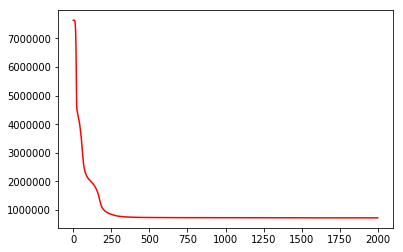

In [14]:
pd.Series(trainingshistorie.history["loss"]).plot(color="red")

C:\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


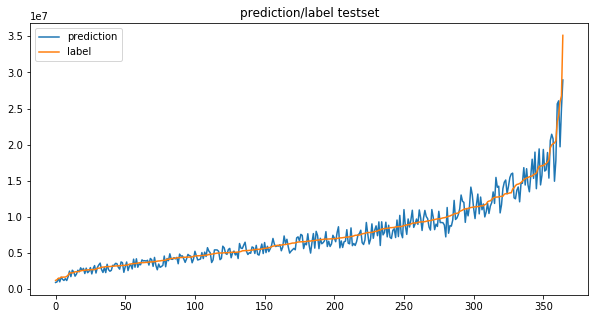

In [29]:
d = pd.DataFrame(y_test_vorhersage, y_test)
d = d.reset_index()
d.columns = ["prediction", "label"]
d.sort_values(by=["label"]).reset_index().plot(title="prediction/label testset", y=["prediction", "label"], figsize=(10, 5))


In [ ]:
approximation = pd.DataFrame(columns=["prediction", "label"], data=([y_test_vorhersage], [y_test])